In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from utils import FAST, corner_orientations
from time import time

%matplotlib inline

me:  0.5645508766174316
cv:  0.0
my keypoints:  2330 
cv keypoints:  1532
corner orientations
[-121.75782112  -20.63352425  -41.43990439 ...  130.81508387   92.31970209
  130.04287393]


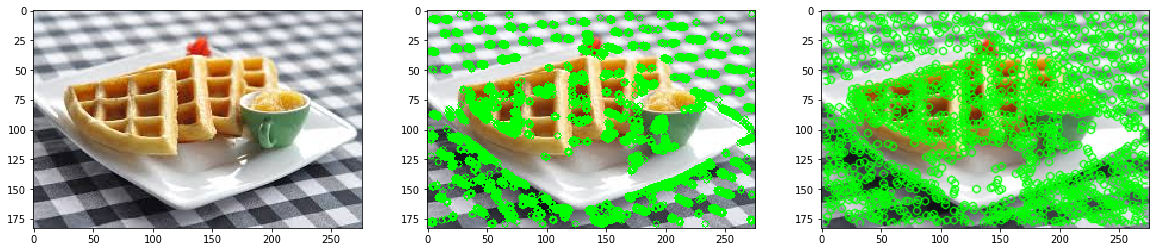

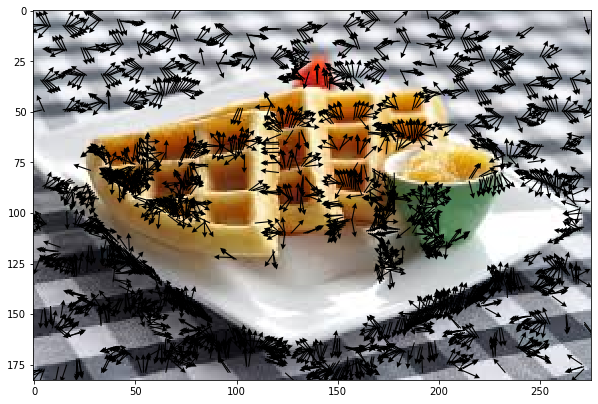

In [69]:
img = cv2.imread('images/waffle.jpg')
original_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

t1 = time()
keypoints = FAST(gray, N=9, threshold=0.15)
print('me: ', time()-t1)
features_img = np.copy(img)

for keypoint in keypoints:
    features_img = cv2.circle(features_img, tuple(keypoint), 3, (0,255,0), 1)
# features_img[keypoints] = [0,255,0]

fig = plt.figure(figsize=(20,30))
plt.subplot(1,3,1)
plt.imshow(img)
plt.subplot(1,3,2)
plt.imshow(features_img)


# using cv2

t2 = time()
fast_cv2 = cv2.FastFeatureDetector_create()
kp = fast_cv2.detect(img, None)
print('cv: ', time()-t2)

img_cv = img
img_cv = cv2.drawKeypoints(img, kp, img_cv, color=(0,255,0))

plt.subplot(1,3,3)
plt.imshow(img_cv)

print('my keypoints: ', len(keypoints), '\ncv keypoints: ', len(kp))

print('corner orientations')
from skimage.morphology import octagon
orientations = corner_orientations(gray, keypoints, octagon(3,2))
print(np.rad2deg(orientations))

plt.figure(figsize=(10,10))
plt.imshow(original_img)
for i in range(keypoints.shape[0]):
    plt.quiver(keypoints[i, 0], keypoints[i, 1], np.cos(orientations[i]), np.sin(orientations[i]), 
               width=0.002, headwidth=5, scale=30)

In [ ]:
img = cv2.imread('images/chess.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

keypoints = FAST(gray, N=9, threshold=0.15)
features_img = np.copy(img)
for keypoint in keypoints:
    features_img = cv2.circle(features_img, tuple(keypoint), 3, (0,255,0), 1)
# features_img[keypoints] = [0,255,0]

fig = plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(img)
plt.subplot(1,2,2)
plt.imshow(features_img)